<a href="https://colab.research.google.com/github/ltocasuche/Metodos1_Fernando_Bareno_Y_Laura_Tocasuche/blob/main/Parcial_2_Parte1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

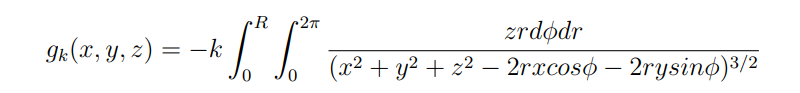

In [ ]:
#PUNTO 24

In [ ]:
#se realizaron 2 opciones para solucionar el problema, en la primera parte implemente la formula de doble cuadratura tal y como esta escrita
#sin embargo da como resultado -152.37, el cual no es el resultado esperado. Al probar la integral a mano tambien encuentro el mismo resultado
#y no logro entender como se debia desarrollar el problema de tal manera que se encontrara un resultado cercano a -9.8.

k = 1.9429303960
R = 1
N = 50
z = 0.2
a = 0
b = 2*np.pi
c = 0
d = R

Roots, Weights = np.polynomial.legendre.leggauss(N)

def g_k(x,y,phi,r):
  return (z*r)/( (x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi) )**(3/2))

def doble_cuadratura(x,y,z,a, b, c, d, N):

    integral = 0

    for i in range(1,N):  # Integración respecto a r
        for j in range(1,N):  # Integración respecto a phi
            phi = (0.5 * (Roots[i] * (b - a) + a + b))
            r = (0.5 * (Roots[j] * (d - c) + c + d))

            integral += (Weights[i] * (b-a) * Weights[j] * g_k(x,y,phi,r))

    return -k * integral * ((d-c)/4)

prueba = doble_cuadratura(0,0,z,a,b,c,d,50)
print(prueba)

-152.37522114196457


In [ ]:
def g_k(x,y,z,phi,r):
  return (z*r)/( (x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi) )**(3/2))

def doble_cuadratura(x,y,z,a, b, c, d, N):

    integral = 0
    Roots, Weights = np.polynomial.legendre.leggauss(N)

    for i in range(N):
        for j in range(N):
            phi = (0.5 * ((Roots[i]) * (b - a) + a + b))
            r = (0.5 * ((Roots[j]) * (d - c) + c + d))

            integral += ((Weights[i]) * (Weights[j]) * (g_k(x,y,z,phi,r)))

    return -k * ((b-a)*(d-c)/4) * integral

In [ ]:
k = 1.9429303960
R = 1.
N = 50.
z = 0.2
a = 0.
b = 2.*np.pi
c = 0.
d = R

In [ ]:
doble_cuadratura(0,0,z,a,b,c,d,50)

-152.59739646274795

In [ ]:
#Para esta parte encontre una manera de conseguir un resultado cercano al que necesitamos, pero la formula no esta aplicada
#de la manera que se explica en las notas de clase, por lo tanto no funciona para cualquier valor.

k = 1.9429303960
R = 1
N = 50
z = 0.2
a = 0
b = 2*np.pi
c = 0

Roots, Weights = np.polynomial.legendre.leggauss(N)

def g_k(x,y,phi,r):
  return (z*r)/(x**2 + y**2 + z**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2)

def doble_cuadratura(x,y,z,a, b, c, d, N):

    integral = 0
    d = R

    for j in range(1,N):  # Integración respecto a r
        for i in range(1,N):  # Integración respecto a phi
            phi = (0.5 * (Roots[i] * (b - a) + a + b))
            r = (0.5 * (Roots[j] * (d - c) + c + d))
            w_phi = Weights[i] * 0.5 * (b-a)
            w_r = Weights[j] * 0.5 * (d-c)
            sumatoria = (w_phi* w_r * g_k(x,y,phi,r))

            integral += sumatoria*((d-c)/4)

    return -k * integral * ((d-c)/4)

prueba = doble_cuadratura(0,0,z,a,b,c,d,50)
print(prueba)

-9.523451321372786


In [ ]:
#PUNTO 25

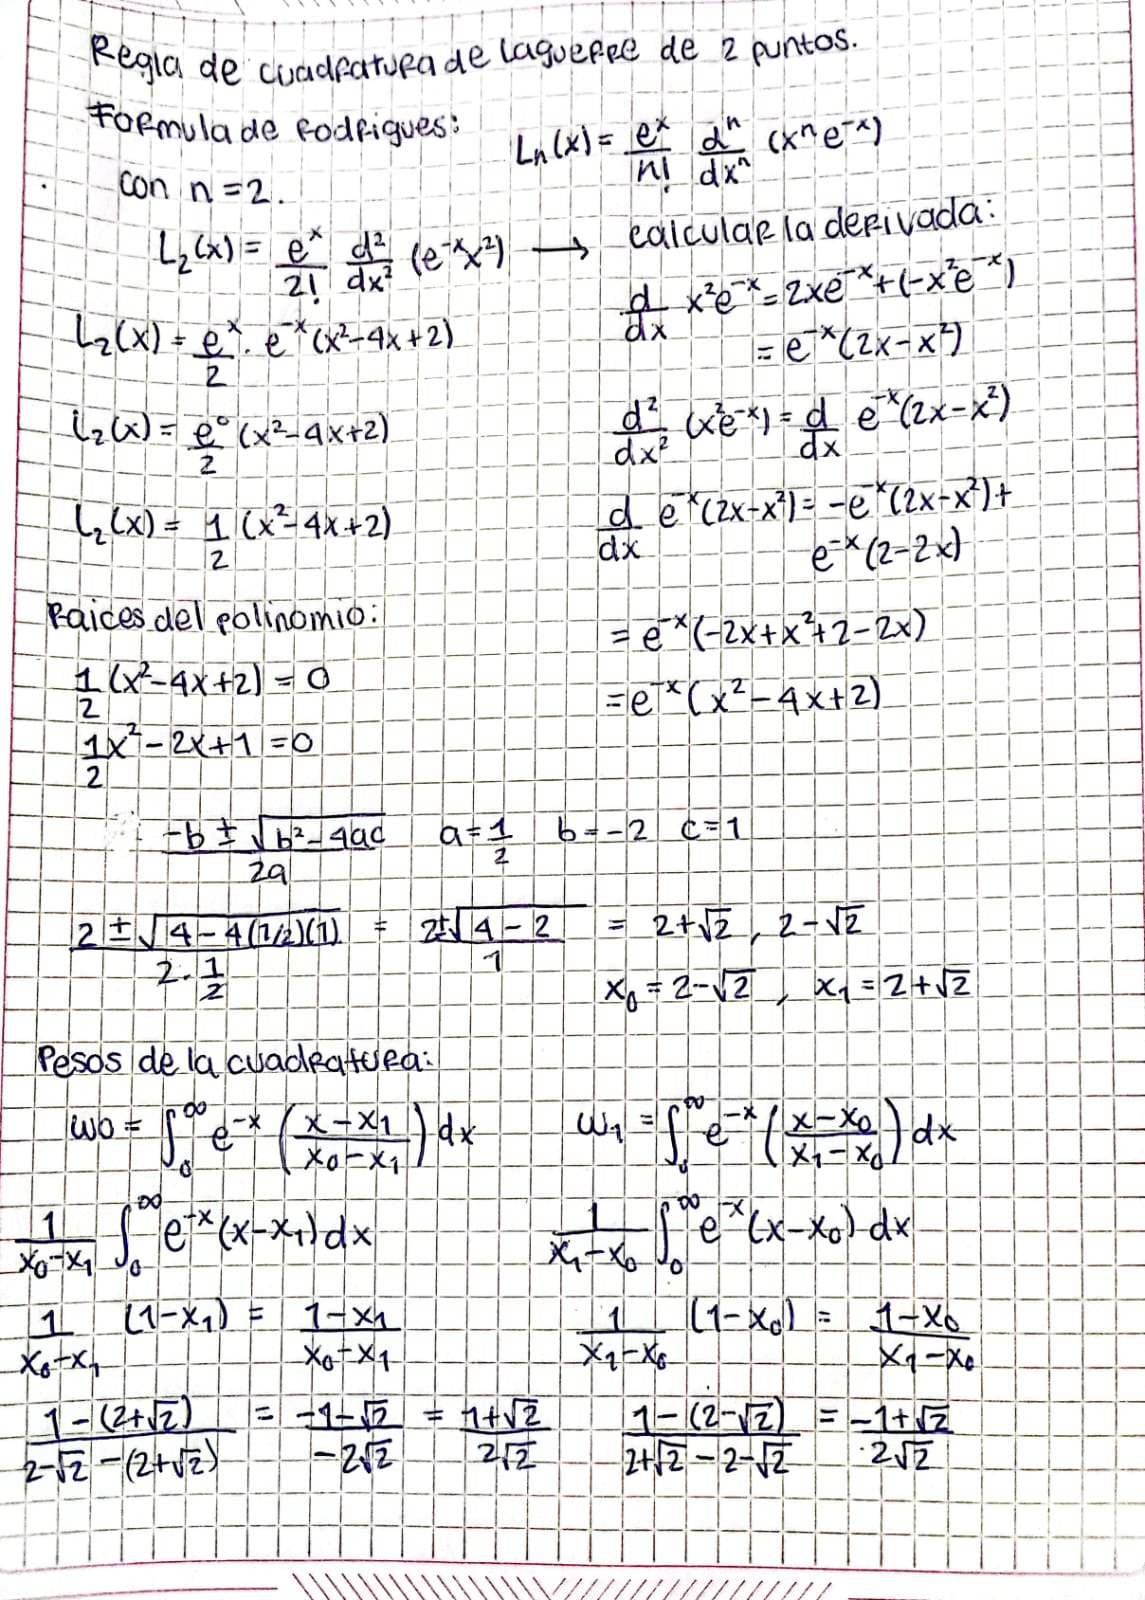

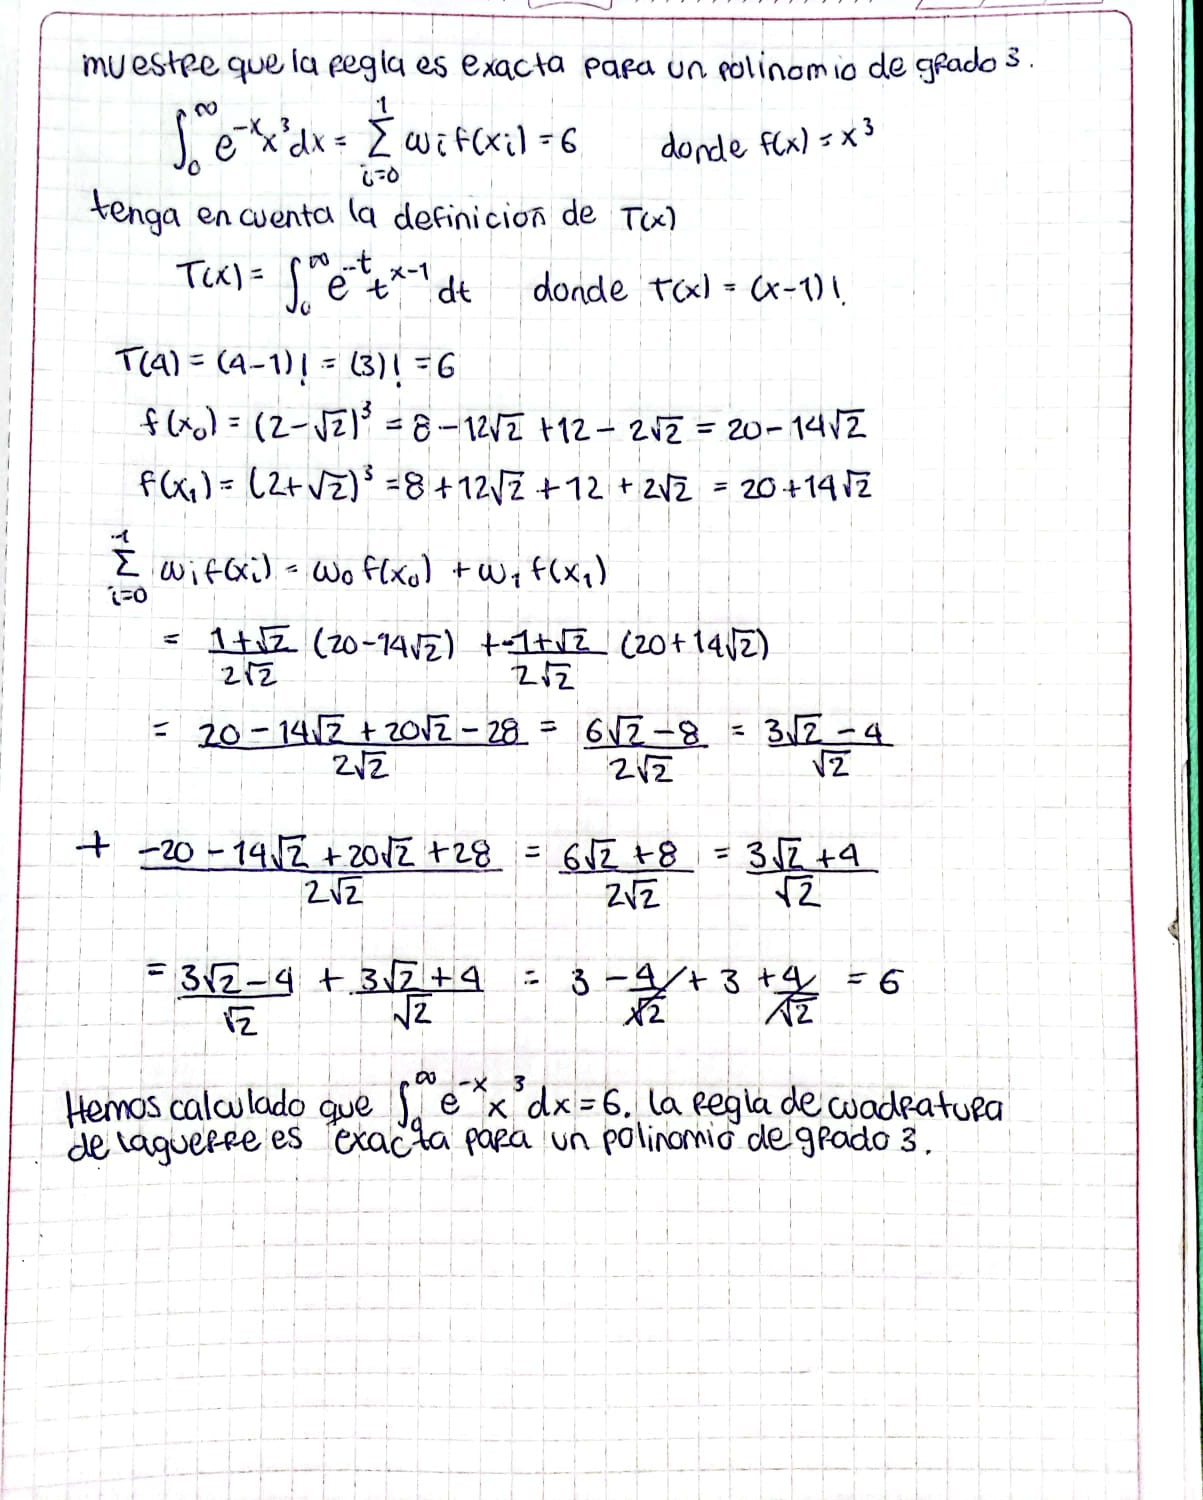

In [ ]:
#PUNTO 27

In [ ]:
import numpy as np

G=(lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**0) + w_1*(x_1**0) + w_2*(x_2**0) + w_3*(x_3**0) - 2., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**1) + w_1*(x_1**1) + w_2*(x_2**1) + w_3*(x_3**1) - 0., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**2) + w_1*(x_1**2) + w_2*(x_2**2) + w_3*(x_3**2) - (2./3.), \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**3) + w_1*(x_1**3) + w_2*(x_2**3) + w_3*(x_3**3) - 0., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**4) + w_1*(x_1**4) + w_2*(x_2**4) + w_3*(x_3**4) - (2./5.), \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**5) + w_1*(x_1**5) + w_2*(x_2**5) + w_3*(x_3**5) - 0., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**6) + w_1*(x_1**6) + w_2*(x_2**6) + w_3*(x_3**6) - (2./7.), \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**7) + w_1*(x_1**7) + w_2*(x_2**7) + w_3*(x_3**7) - 0.)

def F(G,*r):

  n = len(G)
  v = np.zeros(n)
  for i in range(n):
    v[i] = G[i](*r) # vector columna de funciones evaluadas

  return v

r =np.array([0,1,2,3,0,1,2,3])
F(G,*r)

def Jacobian(F, G, *r, h=1e-10):
  n = len(r)
  J = np.zeros((n,n))
  for j in range(n):
    ant = np.copy(r)
    pos = np.copy(r)
    ant[j] -= h
    pos[j] += h
    diff_parcial = (F(G, *pos) - F(G, *ant)) / (2 * h)
    J[:,j] = diff_parcial
  return J

r =np.array([0,1,2,3,0,1,2,3])
Jacobian(F,G,*r)

def Metric(G,*r):
  return 0.5*np.linalg.norm(F(G,*r))**2

def Minimizer(F, G, r, gamma=0.01, epochs=int(1e4), error=1e-10):

  metric = 1
  it = 0

  while metric > error and it < epochs:

    J = Jacobian(F, G,*r)
    Vector = F(G,*r)
    r -= gamma * np.dot(J,Vector)

    metric = Metric(G,*r)
    it += 1
    if metric < 0.005:
        gamma = 0.001

  return r,it, metric

r= np.random.uniform(-1.,1.,size=8)
Minimizer(F, G, r)

def estimacion_cos (F, G, r):
    w,_,_ = Minimizer(F, G, r)
    return w[0]*np.cos(w[4]) + w[1]*np.cos(w[5]) + w[2]*np.cos(w[6]) + w[3]*np.cos(w[7])

r= np.random.uniform(-1.,1.,size=8)
r

# mejor r encontrador = array([-0.43835311, -0.49374854,  0.38062243,  0.04182098,  0.83846713, 0.44829663,  0.04338191,  0.67963616])
# el problema parece ser muy dependiente de los parametros iniciales
estimacion_cos(F, G, r)

1.707323459192275

In [ ]:
#ESTRATEGIA DE MEJOR INVERSIÓN

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class Robot:
    def __init__(self, cuotas, Ca, rate):
        self.cuotas = cuotas
        self.Ca = Ca
        self.rate = rate
        self.r = np.random.uniform(0., 1., size=self.cuotas.shape[0])
        self.r = self.r / np.sum(self.r)  # Normalización inicial

    def mutar(self):
        self.r += np.random.normal(loc=0., scale=self.rate, size=self.cuotas.shape[0])
        self.r = np.abs(self.r)  # Asegura que no haya valores negativos
        self.r = self.r / np.sum(self.r)  # Normaliza para que la suma sea 1

    def retorno(self):
        retorno_por_evento = self.Ca * (self.r * self.cuotas - 1)
        return np.min(retorno_por_evento)

In [14]:
def GetRobots(N, cuotas, Ca, rate):
    Robots = []
    for _ in range(N):
        r = Robot(cuotas, Ca, rate)
        Robots.append(r)
    return Robots

def evaluar_retornos(robots):
    return np.array([robot.retorno() for robot in robots])

def seleccionar_mejores(robots, retornos, num_mejores):
    indices_mejores = np.argsort(retornos)[-num_mejores:]
    return [robots[i] for i in indices_mejores]

def cruzar(robot1, robot2):
    hijo = Robot(robot1.cuotas, robot1.Ca, robot1.rate)
    hijo.r = (robot1.r + robot2.r) / 2
    hijo.r /= np.sum(hijo.r)
    return hijo

In [15]:
def algoritmo_genetico(cuotas, Ca, N, epochs, rate, mejores):
    robots = GetRobots(N, cuotas, Ca, rate)
    mejores_retornos = []

    for epoch in range(epochs):
        retornos = evaluar_retornos(robots)
        mejores_retornos.append(np.max(retornos))

        mejores_robots = seleccionar_mejores(robots, retornos, mejores)

        nueva_generacion = []
        while len(nueva_generacion) < N:
            padre1, padre2 = np.random.choice(mejores_robots, size=2, replace=False)
            hijo = cruzar(padre1, padre2)
            hijo.mutar()
            nueva_generacion.append(hijo)

        robots = nueva_generacion

        if epoch % 10 == 0:
            mejor_fitness = np.max(retornos)
            print(f"Época {epoch} - Mejor retorno: {mejor_fitness}")

    return robots, mejores_retornos

Época 0 - Mejor retorno: 342177.6999169914
Época 10 - Mejor retorno: 675282.8970785503
Época 20 - Mejor retorno: 673552.2132173671
Época 30 - Mejor retorno: 656105.0527592051
Época 40 - Mejor retorno: 664616.0244081223
Época 50 - Mejor retorno: 664367.8447794492
Época 60 - Mejor retorno: 650346.381458591
Época 70 - Mejor retorno: 662319.7559995655
Época 80 - Mejor retorno: 676091.132296077
Época 90 - Mejor retorno: 662565.3500873543
Época 100 - Mejor retorno: 659332.6298840215
Época 110 - Mejor retorno: 665864.4717065592
Época 120 - Mejor retorno: 648787.8127808182
Época 130 - Mejor retorno: 682145.6827194237
Época 140 - Mejor retorno: 676026.4665770042
Época 150 - Mejor retorno: 666342.6462095447
Época 160 - Mejor retorno: 664095.88681807
Época 170 - Mejor retorno: 666133.6733492378
Época 180 - Mejor retorno: 673446.4438970003
Época 190 - Mejor retorno: 679756.8240805764
Época 200 - Mejor retorno: 664362.0967209873
Época 210 - Mejor retorno: 657937.114701106
Época 220 - Mejor retorno:

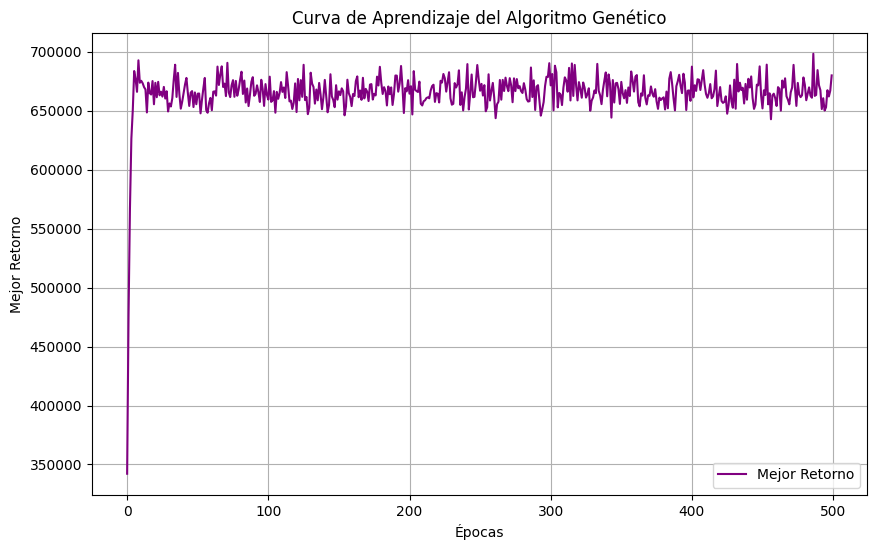

In [17]:
cuotas = np.array([8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])
Ca = 1_000_000
rate = 0.01
N = 500
epochs = 500
mejores = 10

robots_final, mejores_retornos = algoritmo_genetico(cuotas, Ca, N, epochs, rate, mejores)

mejor_ret = np.max(evaluar_retornos(robots_final))
print("Mejor retorno final:", mejor_ret)
mejor_robot = robots_final[np.argmax(evaluar_retornos(robots_final))]
w = mejor_robot.r
print("Vector de pesos del mejor robot:", w)


plt.figure(figsize=(10, 6))
plt.plot(range(epochs), mejores_retornos, color='purple', label='Mejor Retorno')
plt.title('Curva de Aprendizaje del Algoritmo Genético')
plt.xlabel('Épocas')
plt.ylabel('Mejor Retorno')
plt.grid()
plt.legend()
plt.show()